In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## load dataset here
df = pd.read_csv("/content/drive/My Drive/Datasets/Coffee Taste Test/coffee_survey.csv")
df.head()

,submission_id,age,cups,where_drink,brew,brew_other,purchase,purchase_other,favorite,favorite_specify,...,spent_equipment,value_equipment,gender,gender_specify,education_level,ethnicity_race,ethnicity_race_specify,employment_status,number_children,political_affiliation
0,gMR29l,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,Regular drip coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BkPN0e,25-34 years old,NaN,NaN,Pod/capsule machine (e.g. Keurig/Nespresso),NaN,NaN,NaN,Iced coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W5G8jj,25-34 years old,NaN,NaN,Bean-to-cup machine,NaN,NaN,NaN,Regular drip coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4xWgGr,35-44 years old,NaN,NaN,Coffee brewing machine (e.g. Mr. Coffee),NaN,NaN,NaN,Iced coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QD27Q8,25-34 years old,NaN,NaN,Pour over,NaN,NaN,NaN,Latte,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 57 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   submission_id                 4042 non-null   object 
 1   age                           4011 non-null   object 
 2   cups                          3949 non-null   object 
 3   where_drink                   3972 non-null   object 
 4   brew                          3657 non-null   object 
 5   brew_other                    678 non-null    object 
 6   purchase                      710 non-null    object 
 7   purchase_other                31 non-null     object 
 8   favorite                      3980 non-null   object 
 9   favorite_specify              114 non-null    object 
 10  additions                     3959 non-null   object 
 11  additions_other               48 non-null     object 
 12  dairy                         1686 non-null   object 
 13  swe

In [5]:
df.isna().sum()

,0
submission_id,0
age,31
cups,93
where_drink,70
brew,385
brew_other,3364
purchase,3332
purchase_other,4011
favorite,62
favorite_specify,3928


In [6]:
#Remove rows with missing values in critical columns
critical_columns = ['submission_id', 'age', 'cups', 'favorite']
df.dropna(subset=critical_columns, inplace=True)


In [7]:
#Fill missing categorical values with 'Unknown' or 'Not Specified'
df.fillna({
    'brew': 'Not Specified',
    'purchase': 'Unknown',
    'dairy': 'None',
    'sweetener': 'None'
}, inplace=True)


In [8]:
# Convert categorical columns to category data type
categorical_cols = [
    'age', 'where_drink', 'brew', 'purchase', 'favorite',
    'additions', 'style', 'strength', 'roast_level', 'caffeine',
    'wfh', 'total_spend', 'taste', 'know_source',
    'most_paid', 'most_willing', 'value_cafe', 'spent_equipment',
    'value_equipment', 'gender', 'education_level', 'ethnicity_race',
    'employment_status', 'number_children', 'political_affiliation'
]
df[categorical_cols] = df[categorical_cols].astype('category')


In [9]:
#Split 'where_drink' into separate binary columns
df_split = df.join(df['where_drink'].str.get_dummies(sep=', '))

#Split 'brew' into separate binary columns
df_split = df.join(df['brew'].str.get_dummies(sep=', '))




In [10]:
# Remove duplicates
df.drop_duplicates(inplace=True)

#Market Research

##1. Demographic Segmentation

####a.Age

In [ ]:
df['age'].value_counts()

,count
age,
25-34 years old,1947
35-44 years old,944
18-24 years old,443
45-54 years old,296
55-64 years old,181
>65 years old,93
<18 years old,18


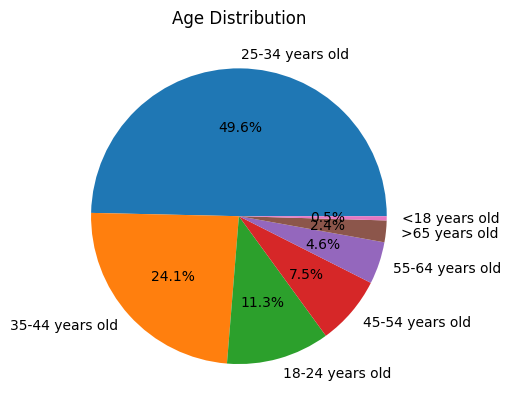

In [ ]:
df['age'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Age Distribution')
plt.ylabel('')
plt.show()

####b. Gender

In [ ]:
df['gender'].value_counts()

,count
gender,
Male,2524
Female,853
Non-binary,103
Prefer not to say,33
Other (please specify),10


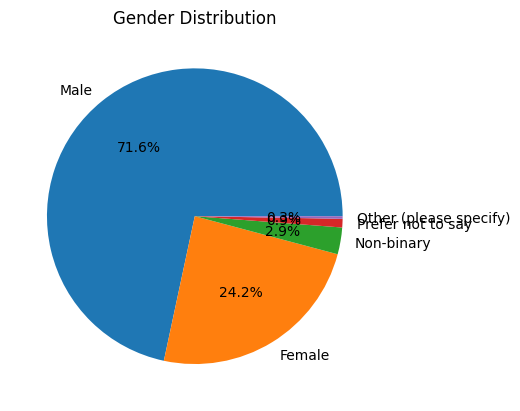

In [ ]:
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

####c. Education Level

In [ ]:
df['education_level'].value_counts()

,count
education_level,
Bachelor's degree,1759
Master's degree,738
Some college or associate's degree,461
Doctorate or professional degree,340
High school graduate,118
Less than high school,22


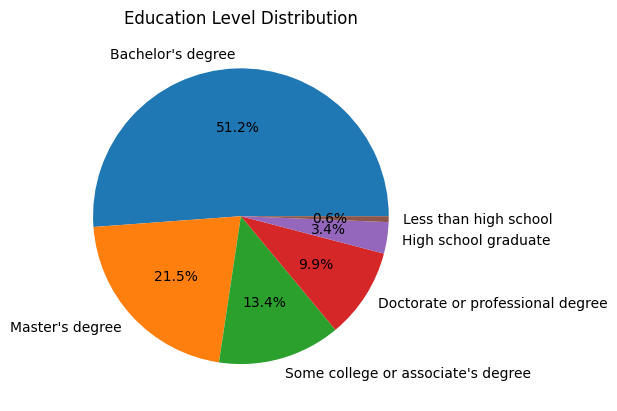

In [ ]:
df['education_level'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Education Level Distribution')
plt.ylabel('')
plt.show()

####d. Employment Status

In [ ]:
df['employment_status'].value_counts()

,count
employment_status,
Employed full-time,2708
Student,221
Employed part-time,201
Unemployed,126
Retired,85
Homemaker,78


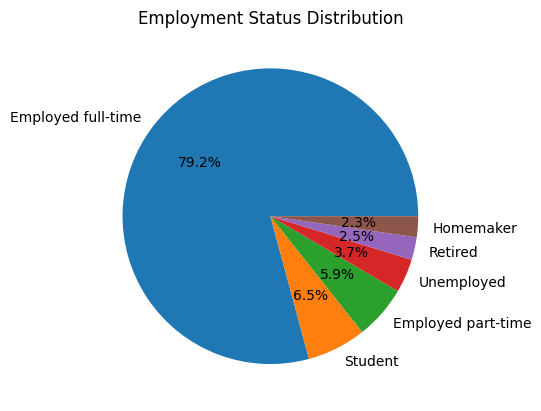

In [ ]:
df['employment_status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Employment Status Distribution')
plt.ylabel('')
plt.show()

##2 Behavioral Segmentation

####a.Coffee Consumption

In [ ]:
df['cups'].value_counts()

,count
cups,
2,1650
1,1273
3,468
Less than 1,344
4,121
More than 4,66


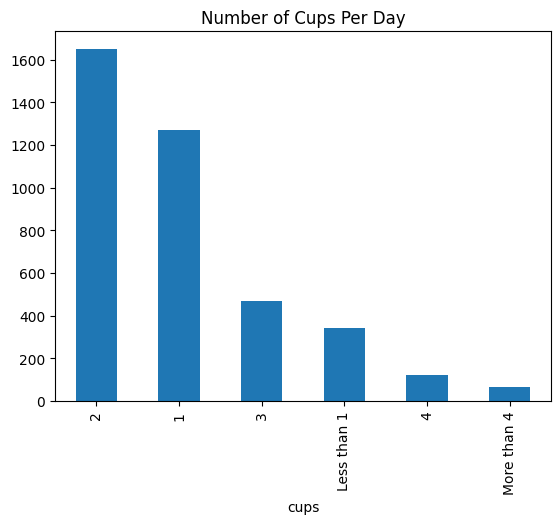

In [ ]:
df['cups'].value_counts().plot(kind='bar')
plt.title('Number of Cups Per Day')
plt.ylabel('')
plt.show()

####b. Coffee Preferences

In [ ]:
df['strength'].value_counts()

,count
strength,
Somewhat strong,1776
Medium,1408
Very strong,428
Somewhat light,215
Weak,42


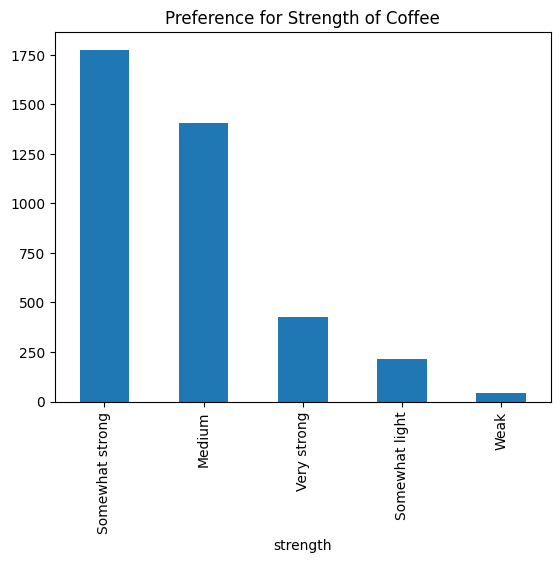

In [ ]:
df['strength'].value_counts().plot(kind='bar')
plt.title('Preference for Strength of Coffee')
plt.ylabel('')
plt.show()

In [ ]:
df['roast_level'].value_counts()

,count
roast_level,
Light,1756
Medium,1534
Dark,403
Nordic,78
Blonde,74
Italian,23
French,21


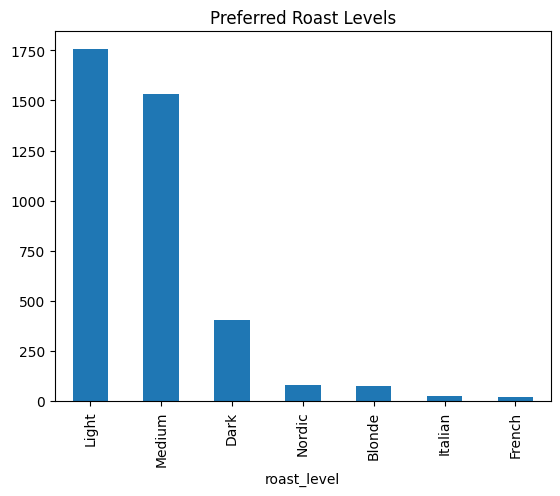

In [ ]:
df['roast_level'].value_counts().plot(kind='bar')
plt.title('Preferred Roast Levels')
plt.ylabel('')
plt.show()

In [ ]:
df['caffeine'].value_counts()

,count
caffeine,
Full caffeine,3530
Half caff,204
Decaf,136


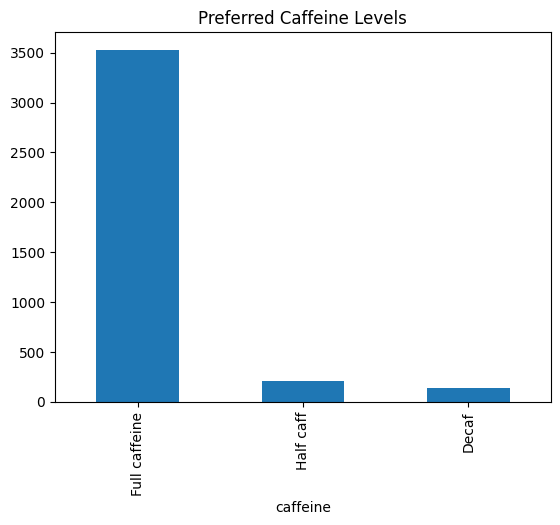

In [ ]:
df['caffeine'].value_counts().plot(kind='bar')
plt.title('Preferred Caffeine Levels')
plt.ylabel('')
plt.show()

####c. Buying Behavior

In [ ]:
df_encoded = pd.get_dummies(df[['spent_equipment', 'total_spend', 'purchase']], drop_first=True)

In [ ]:
df_numeric = df[['expertise', 'cups']].copy()

# Convert 'cups' to numeric (e.g., using a mapping)
cups_mapping = {'Less than 1': 0, '1': 1, '2': 2, '3': 3, '4': 4, 'More than 4': 5}
df_numeric['cups'] = df_numeric['cups'].map(cups_mapping)

In [ ]:
# Combine encoded and numeric features
buying_behavior = pd.concat([df_encoded, df_numeric], axis=1)

In [ ]:
buying_behavior['cups'].info()

<class 'pandas.core.series.Series'>
Index: 3922 entries, 8 to 4041
Series name: cups
Non-Null Count  Dtype
--------------  -----
3922 non-null   int64
dtypes: int64(1)
memory usage: 61.3 KB


In [ ]:
buying_behavior.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
# Standardize the combined data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(buying_behavior)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

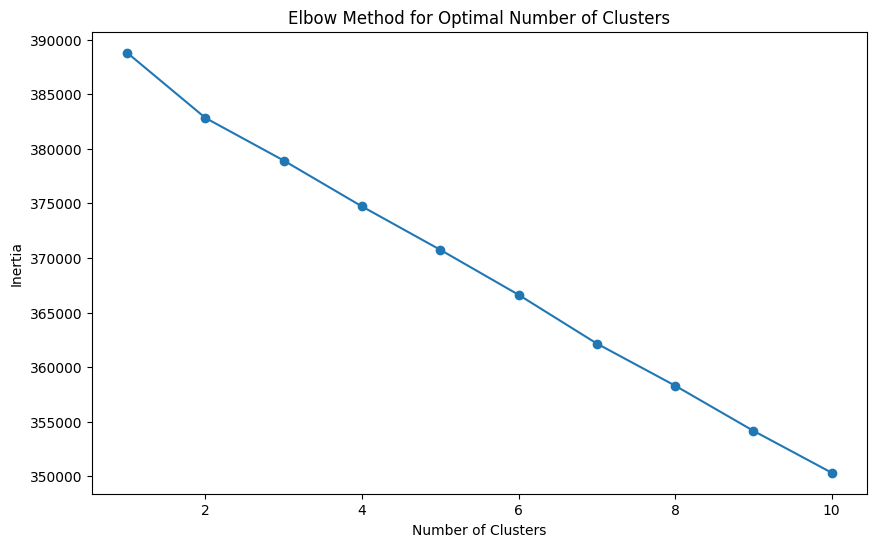

In [ ]:
# Determine optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Apply K-Means clustering with the optimal number of clusters
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
buying_behavior['cluster'] = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
buying_behavior.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3888 entries, 14 to 4041
Columns: 101 entries, spent_equipment_$20-$50 to cluster
dtypes: bool(98), category(1), float64(1), int32(1)
memory usage: 452.0 KB


In [ ]:
segment_summary = buying_behavior.groupby('cluster').mean()
segment_summary

,spent_equipment_$20-$50,spent_equipment_$300-$500,spent_equipment_$50-$100,spent_equipment_$500-$1000,spent_equipment_Less than $20,"spent_equipment_More than $1,000",total_spend_$40-$60,total_spend_$60-$80,total_spend_$80-$100,total_spend_<$20,...,"purchase_Specialty coffee shop, National chain (e.g. Starbucks, Dunkin)","purchase_Specialty coffee shop, National chain (e.g. Starbucks, Dunkin), Deli or supermarket, Local cafe","purchase_Specialty coffee shop, National chain (e.g. Starbucks, Dunkin), Drive-thru","purchase_Specialty coffee shop, National chain (e.g. Starbucks, Dunkin), Local cafe","purchase_Specialty coffee shop, National chain (e.g. Starbucks, Dunkin), Local cafe, Deli or supermarket","purchase_Specialty coffee shop, National chain (e.g. Starbucks, Dunkin), Local cafe, Deli or supermarket, Drive-thru","purchase_Specialty coffee shop, Other, Local cafe",purchase_Unknown,expertise,cups
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.005504,0.193670,0.014448,0.212934,0.002064,0.260062,0.322325,0.125559,0.067423,0.007224,...,0.008944,0.000000,0.001032,0.004816,0.000344,0.000344,0.000688,0.840729,6.314069,1.940488
1,0.175331,0.034659,0.273191,0.023445,0.237513,0.024465,0.114169,0.022426,0.027523,0.412844,...,0.004077,0.001019,0.000000,0.003058,0.000000,0.000000,0.000000,0.766565,3.856269,1.117227


**Cluster Characteristics:**

- **Cluster 0:**
  - Higher spending on equipment in the "$500-$1000" and "More than $1,000" categories.

  - Predominantly purchases coffee from a combination of local cafes and specialty coffee shops.

  - Moderate total spend on coffee, with a range of spending including "$40-$60" and "$60-$80".

- **Cluster 1:**

  - Higher spending on equipment in the "$20-$50" and "$50-$100" categories.

  - Significant proportion purchases coffee from local cafes, national chains, and specialty coffee shops.
  
  - Higher total spend on coffee in the "$100+" category.

#Customer Segmentation

##1. Preprocessing

In [ ]:
taster_background_cols = ['age', 'cups', 'At a cafe', 'At home', 'At the office', 'None of these', 'On the go', 'nan', 'favorite', 'style', 'strength', 'roast_level', 'caffeine', 'expertise']

In [ ]:
taster_background = df[taster_background_cols]

In [ ]:
taster_background.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3922 entries, 8 to 4041
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            3922 non-null   category
 1   cups           3922 non-null   category
 2   At a cafe      3922 non-null   int64   
 3   At home        3922 non-null   int64   
 4   At the office  3922 non-null   int64   
 5   None of these  3922 non-null   int64   
 6   On the go      3922 non-null   int64   
 7   nan            3922 non-null   int64   
 8   favorite       3922 non-null   category
 9   style          3905 non-null   category
 10  strength       3869 non-null   category
 11  roast_level    3889 non-null   category
 12  caffeine       3870 non-null   category
 13  expertise      3888 non-null   category
dtypes: category(8), int64(6)
memory usage: 376.5 KB


In [ ]:
#one-hot encoding
one_hot_cols = [ 'cups', 'favorite', 'style']

taster_background_encoded = pd.get_dummies(taster_background, columns=one_hot_cols)

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
label_cols = ['age', 'strength', 'roast_level', 'caffeine', 'expertise']

label_encoder = LabelEncoder()
taster_background_encoded[label_cols] = taster_background_encoded[label_cols].apply(label_encoder.fit_transform)

In [ ]:
taster_background_encoded.head()

,age,At a cafe,At home,At the office,None of these,On the go,nan,strength,roast_level,caffeine,...,style_Bright,style_Caramalized,style_Chocolatey,style_Floral,style_Fruity,style_Full Bodied,style_Juicy,style_Light,style_Nutty,style_Sweet
8,1,1,0,0,0,0,0,5,7,3,...,False,False,False,False,False,False,False,True,False,False
13,5,1,1,1,0,1,0,1,4,1,...,False,False,False,False,False,True,False,False,False,False
14,1,0,0,1,0,0,0,2,4,1,...,False,False,False,False,True,False,False,False,False,False
15,5,1,1,1,0,0,0,0,4,1,...,True,False,False,False,False,False,False,False,False,False
16,6,1,0,1,0,0,0,2,0,1,...,False,False,False,False,True,False,False,False,False,False


##2. Perform Segmentation

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

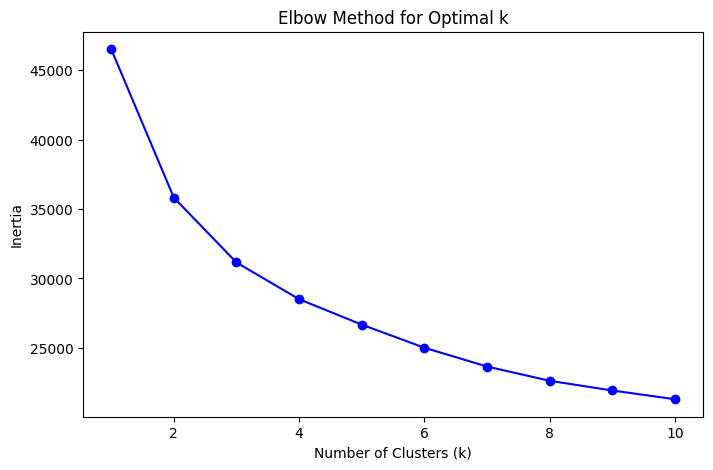

In [ ]:
#select number of segments
from sklearn.cluster import KMeans
k_values = range(1, 11)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(taster_background_encoded)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow plot
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
taster_background_encoded['cluster'] = kmeans.fit_predict(taster_background_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
taster_background_encoded['cluster'].value_counts()

,count
cluster,
2,2215
1,1216
0,491


In [ ]:
segment_summary = taster_background_encoded.groupby('cluster').mean()
segment_summary

,age,At a cafe,At home,At the office,None of these,On the go,nan,strength,roast_level,caffeine,...,style_Bright,style_Caramalized,style_Chocolatey,style_Floral,style_Fruity,style_Full Bodied,style_Juicy,style_Light,style_Nutty,style_Sweet
cluster,,,,,,,,,,,,,,,,,,,,,
0,1.940937,0.250509,0.881874,0.368635,0.008147,0.197556,0.002037,1.841141,0.894094,1.036660,...,0.030550,0.079430,0.291242,0.010183,0.028513,0.213849,0.004073,0.000000,0.089613,0.054990
1,1.606908,0.256579,0.860197,0.318257,0.018914,0.175164,0.003289,1.186678,4.615954,1.022204,...,0.076480,0.092105,0.183388,0.042763,0.163651,0.144737,0.041941,0.000000,0.099507,0.114309
2,1.439278,0.323251,0.951242,0.377878,0.004063,0.174718,0.004966,1.416253,4.449210,1.057336,...,0.107901,0.055982,0.114221,0.059142,0.329571,0.086682,0.097517,0.000451,0.061400,0.055530


##3. Analyzing Each Segment

- **Cluster 0:** might be younger coffee drinkers who prefer drinking coffee at home.
- **Cluster 1:** could represent office workers who drink multiple cups of strong coffee throughout the day.
- **Cluster 2:** might include coffee enthusiasts who prefer specific brew methods and have a refined taste for certain coffee types.

#Customer Persona Development

For each cluster, create a persona by summarizing their key characteristics. This involves interpreting the average values and distributions for each feature in the cluster.

##1. Customer Persona Template

Each persona will include:
- **Demographics:** Age, gender, etc.
- **Behavior:** Drinking habits, preferred locations, etc.
- **Preferences:** Coffee strength, roast level, favorite types.
- **Challenges/Needs:** What might this persona be looking for in a coffee product or experience?

##2. Personas

**Persona 1: The Home Coffee Enthusiast**
- Demographics:
  - Age: 30-40
  - Typically drinks coffee at home
- Behavior:
  - Drinks 2-3 cups per day
  - Prefers strong coffee
- Preferences:
  - Likes medium to dark roast
  - Enjoys experimenting with different brewing methods (e.g., pour-over, French press)
  - Favorite coffee type: Americano or Cappuccino
- Challenges/Needs:
  - Interested in high-quality beans and brewing equipment
  - Values variety and unique flavors

**Persona 2: The Office Coffee Drinker**
- Demographics:
  - Age: 25-35
  - Drinks coffee at the office
- Behavior:
  - Drinks 4-5 cups per day
  - Prefers moderate strength
- Preferences:
  - Light to medium roast
  - Often drinks coffee with milk or cream
  - Favorite coffee type: Blended drink (e.g., Frappuccino)
- Challenges/Needs:
  - Looking for convenience and affordability
  - Interested in bulk buying options

**Persona 3: The Cafe Goer**
- Demographics:
  - Age: 20-30
  - Enjoys coffee at cafes
- Behavior:
  - Drinks 1-2 cups per day
  - Prefers coffee with unique flavors
- Preferences:
  - Medium roast
  - Enjoys trying new coffee drinks
  - Favorite coffee type: Specialty drinks or seasonal flavors
- Challenges/Needs:
  - Looking for premium experiences and new flavors
  - Interested in trendy coffee options

#Taster Preferences Correlation

In [ ]:
taster_preferences_cols = ['coffee_a_bitterness', 'coffee_a_acidity', 'coffee_a_personal_preference', 'coffee_b_bitterness', 'coffee_b_acidity', 'coffee_b_personal_preference', 'coffee_c_bitterness', 'coffee_c_acidity', 'coffee_c_personal_preference', 'coffee_d_bitterness', 'coffee_d_acidity', 'coffee_d_personal_preference']
taster_preferences = df[taster_preferences_cols]

In [ ]:
# Calculate the Pearson correlation matrix
correlation_matrix = taster_preferences.corr()

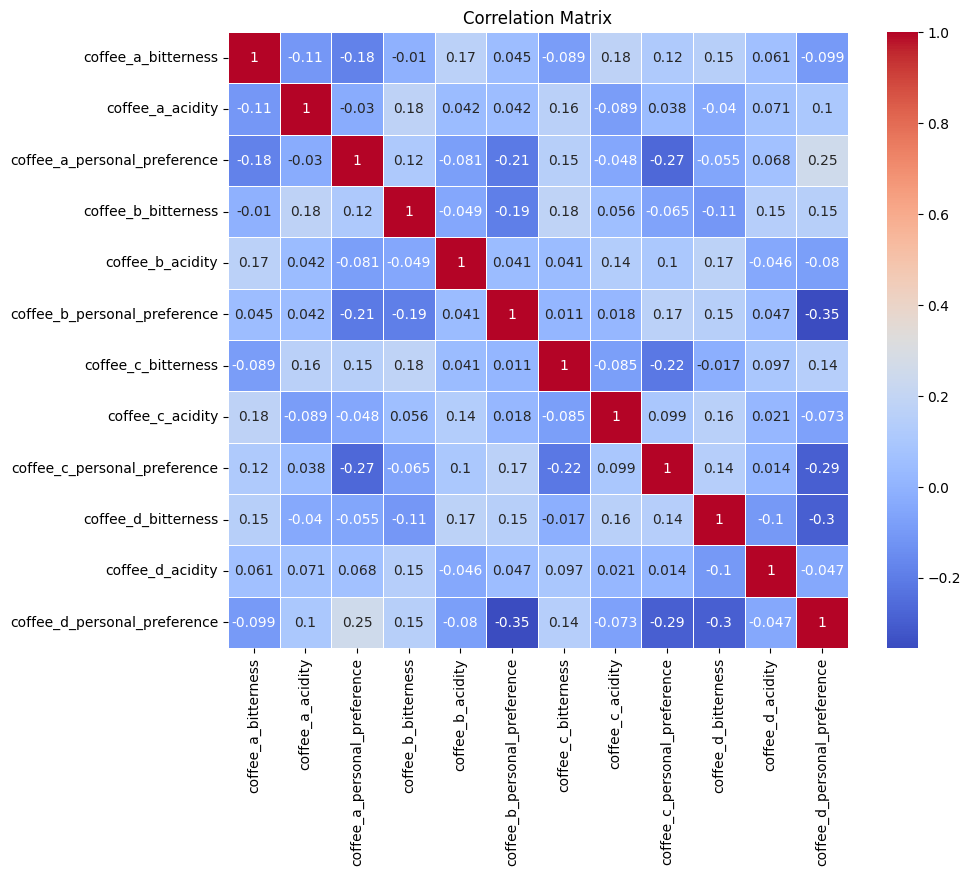

In [ ]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

1. **Understanding the Correlation Matrix**
- Correlation Values:
  - Correlation coefficients range from -1 to 1.
  - +1: Perfect positive correlation (as one variable increases, the other also increases).
  - -1: Perfect negative correlation (as one variable increases, the other decreases).
  - 0: No correlation.

2. **Key Observations**
- Negative Correlations:

  - coffee_c_personal_preference and coffee_a_personal_preference have a strong negative correlation (-0.267572). This suggests that participants who prefer Coffee C are less likely to prefer Coffee A.
  - coffee_d_personal_preference and coffee_b_personal_preference have a strong negative correlation (-0.354810), indicating a similar trend between Coffees D and B.
- Positive Correlations:

  - coffee_c_personal_preference and coffee_d_bitterness show a moderate positive correlation (0.144883), suggesting that those who prefer Coffee C might also appreciate the bitterness in Coffee D.
  - coffee_a_personal_preference and coffee_d_personal_preference have a moderately positive correlation (0.252598), implying some overlap in preferences for Coffees A and D.
- Bitterness and Acidity:

  - coffee_c_bitterness and coffee_b_bitterness have a positive correlation (0.183945), which suggests that the bitterness levels in these coffees might be perceived similarly by the participants.
  - The bitterness and acidity correlations within the same coffee (e.g., coffee_a_bitterness with coffee_a_acidity) are generally low, indicating that these attributes are perceived independently.

3. **Detailed Analysis**
- Personal Preference Analysis:

  - The negative correlation between coffee_b_personal_preference and coffee_d_personal_preference (-0.354810) is particularly interesting. It suggests a clear divide in the participants' preferences between these two coffees. This could be due to significant differences in their flavor profiles, such as bitterness or acidity.
- Cross-Attribute Correlation:

  - For Coffee C, coffee_c_bitterness and coffee_c_acidity are negatively correlated (-0.084768), which could indicate that participants who found Coffee C bitter did not find it acidic, and vice versa.
Consistency in Ratings:

  - The correlations between the same attributes across different coffees (e.g., coffee_a_bitterness with coffee_b_bitterness) show varying levels of correlation, suggesting that participants might be consistent in their perception of bitterness across different samples.

4. **Insights and Actionable Conclusions**
- Segmentation: You can use these correlations to segment your participants into distinct preference groups. For instance, those who like Coffee D tend to dislike Coffee B, so these could represent two different target audiences.
- Product Development: The strong negative correlations between preferences for different coffees suggest opportunities for product differentiation. For example, developing a new coffee blend that appeals to one of these distinct groups.
- Marketing Strategy: The positive correlation between coffee_c_personal_preference and coffee_d_bitterness could inform a marketing strategy that emphasizes bitterness as a key selling point for both coffees.

#Hypothesis Testing


Hypothesis Testing is a statistical method used to make inferences or draw conclusions about a population based on sample data


##1. Formulating Hypotheses 1

- H₀: There is no difference in coffee expertise between those who prefer strong coffee and those who do not.
- H₁: There is a difference in coffee expertise between those who prefer strong coffee and those who do not.

###1.1. Conduct the Test







In [ ]:
strong_coffee_group = df[df['strength'].isin(['Somewhat strong', 'Very strong'])]['expertise']
not_strong_coffee_group = df[df['strength'].isin(['Weak', 'Somewhat light', 'Medium'])]['expertise']


In [ ]:
strong_coffee_group.dropna(inplace=True)
not_strong_coffee_group.dropna(inplace=True)

<ipython-input-58-939932db110b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strong_coffee_group.dropna(inplace=True)
<ipython-input-58-939932db110b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_strong_coffee_group.dropna(inplace=True)


In [ ]:
sample1 = np.array(strong_coffee_group)
sample2 = np.array(not_strong_coffee_group)

In [ ]:
from scipy import stats
# Perform the t-test
t_statistic, p_value = stats.ttest_ind(sample1, sample2)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


T-statistic: 8.986730910180666
P-value: 3.9062683482985667e-19


###1.2 Result

The p-value is extremely small (much less than 0.05), indicating that the result is statistically significant. This means we can **reject** the null hypothesis H₀.



###1.3 Conclusion

There is a statistically significant difference in coffee expertise between those who prefer strong coffee (Somewhat strong and Very strong) and those who do not (Weak, Somewhat light, and Medium). The high t-statistic also suggests that the difference between the means of the two groups is substantial.

##2. Formulating Hypotheses 2

H₀: The average amount spent on coffee equipment is equal for all levels of coffee expertise.
H₁: The average amount spent on coffee equipment varies across different levels of coffee expertise.

###2.1. Conduct the Test

In [ ]:
# Mapping spent_equipment categories to numeric values
equipment_mapping = {
    'Less than $20': 1,
    '$20-$50': 2,
    '$50-$100': 3,
    '$100-$300': 4,
    '$300-$500': 5,
    '$500-$1000': 6,
    'More than $1,000': 7
}

df['spent_equipment_numeric'] = df['spent_equipment'].map(equipment_mapping)


In [ ]:
# Group data by expertise levels
groups = [group['spent_equipment_numeric'].dropna() for name, group in df.groupby('expertise')]

In [ ]:
# Perform the ANOVA test
F_statistic, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {F_statistic}")
print(f"P-value: {p_value}")

F-statistic: 128.24062856509232
P-value: 3.9598972225387633e-209


###2.2 Result

The p-value is extraordinarily small, far below any common significance level (e.g., 0.05). This means that we can confidently **reject** the null hypothesis H₀.

###2.3 Conclusion

There is strong evidence to support the alternative hypothesis (H₁), indicating that the average amount spent on coffee equipment varies significantly across different levels of coffee expertise. This suggests that coffee expertise influences spending behavior on coffee equipment.